## Observations and Insights 

In [11]:
 %matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [12]:
#merge data frames into one dataframe
smoosh_df =  pd.merge(mouse_metadata, study_results, on=('Mouse ID'))
smoosh_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
#finding duplicates
dupes = smoosh_df.duplicated(subset=["Mouse ID", "Timepoint"])
dupes
# Getting the Mouse ID numbers that show up with duplicate Timepoints. 
smoosh_df['Dupes'] = smoosh_df.duplicated(subset=["Mouse ID", "Timepoint"])
# Optional: Display all the data for the duplicate mouse ID, thank you Lauren for making my code cleaner. 
dupes = smoosh_df.loc[(smoosh_df["Dupes"] ==True)]
dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Dupes
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [14]:
#the duplicates
the_dupe_df = smoosh_df.loc[(smoosh_df["Mouse ID"] =="g989")]
the_dupe_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Dupes
908,g989,Propriva,Female,21,26,0,45.000000,0,False
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,False
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,False
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,False
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,False
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [15]:
#duplicates removed
clean_df = smoosh_df.loc[(smoosh_df["Mouse ID"]!="g989")].drop("Dupes", axis=1)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [35]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
grouped = clean_df.groupby("Drug Regimen")
#grouped.head() to make sure group by worked
tum_mean = grouped["Tumor Volume (mm3)"].mean()
tum_med = grouped["Tumor Volume (mm3)"].median()
tum_std = grouped["Tumor Volume (mm3)"].std()
tum_sem = grouped["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
grouped = pd.DataFrame({"Mean" : tum_mean, "Median": tum_med, 
                        "Standard Deviation": tum_std, "SEM": tum_sem})
grouped.head(10)

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [17]:
# Using the aggregation method, produce the same summary statistics in a single line
small_df = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]].head()
small_df.agg(
    ({"Drug Regimen","Tumor Volume (mm3)": ['mean', 'median', 'std', 'sem']}))

SyntaxError: invalid syntax (<ipython-input-17-167ba892d523>, line 4)

## Bar and Pie Charts

<IPython.core.display.Javascript object>


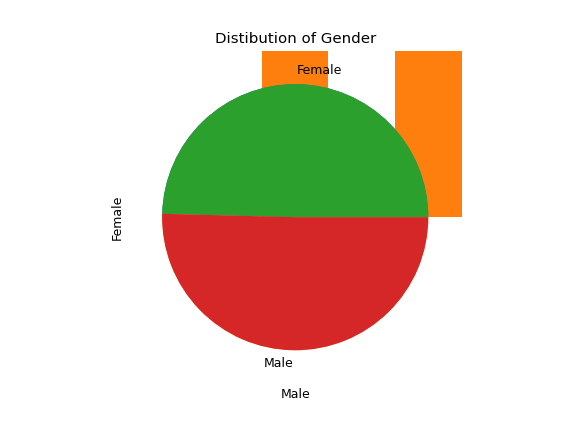

Text(0.5, 1.0, 'Number of Data Points for Each Treatment Regimen')

In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_plot = clean_df['Drug Regimen'].value_counts().plot.bar(width=0.5)
#making the graph nicer
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Data Points")
bar_plot.set_title("Number of Data Points for Each Treatment Regimen")

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#drug regimen count
drug_count = clean_df["Drug Regimen"].value_counts()
drug_count

#set x axis to drug count
xaxis = np.arange(len(drug_count))
plt.bar(xaxis, drug_count, width =0.5)
plt.show()


In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#went over this in office hours
gen_num = clean_df.groupby(["Sex"])
gen_count = gen_num["Mouse ID"].nunique()
gen_count.name = ""
gen_count.plot(kind = 'pie', title=("Distibution of Gender"))
gen_count

Sex
Female    123
Male      125
Name: , dtype: int64

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gen_count)
plt.show()
plt.xlabel('Male')
plt.ylabel('Female')

Text(123.87999671830076, 0.5, 'Female')

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = clean_df.groupby("Mouse ID")["Timepoint"].max()
max_time
max_time['Max Time']= clean_df.groupby("Mouse ID")["Timepoint"].max()
max_time
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(clean_df, max_time, on='Mouse ID').rename(columns={"Timepoint_x" : "Timepoint", 
                                                                       "Timepoint_y" : "Max Timepoint"})
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [ ]:
# Put treatments into a list for a for loop (and later for plot labels), thanks google
drugs = merge_df['Drug Regimen'].to_list() 

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq= quartiles[0.75]
iqr = upperq-lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
